In [1]:
# Importing liibraries.
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [2]:
# Loading labels.
directory = "./resources/data"
csv_file = "index.csv"
csv_path = os.path.join(directory, csv_file)
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [3]:
# Loading images.
image_name = data_name.iloc[9, 1]
image_path = os.path.join(directory, image_name)

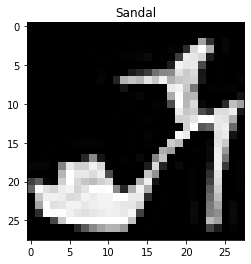

In [4]:
# Showing image.
image = Image.open(image_path)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[9, 0])
plt.show()

In [5]:
# Building class.
class Dataset(Dataset):
    
    def __init__(self, csv_file, data_dir, transform=None):
        self.transform = transform
        self.data_dir = data_dir
        data_csv_file = os.path.join(self.data_dir, csv_file)
        self.data_name = pd.read_csv(data_csv_file)
        
        self.len = self.data_name.shape[0]
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx, 1])
        image = Image.open(img_name)
        y = self.data_name.iloc[idx, 0]
        
        
        if self.transform:
            image = self.transform(image)
        return image, y

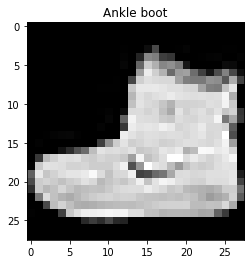

In [6]:
# Use class.
dataset = Dataset(csv_file=csv_file, data_dir=directory)
image, y = dataset[0]
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

In [7]:
# Torchvision transforms.
from torchvision import transforms

croptensor_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])

dataset_ = Dataset(csv_file=csv_file, data_dir=directory, transform=croptensor_transform) # Calling in class.
print(dataset_[0][0].shape) # There is another dimension.

torch.Size([1, 20, 20])
